In [1]:
# data of NIFTPHARMA, AUROPHARMAALLN, ALKEMALLN

In [133]:
#importing libs
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# datafram
AUROPHARMAALLN = pd.read_csv('G:/Jupyter/Stock data/AUROPHARMAALLN.csv')
ALKEMALLN = pd.read_csv('G:/Jupyter/Stock data/ALKEMALLN.csv')
NIFTPHARMA = pd.read_csv('G:/Jupyter/Stock data/NIFTPHARMA.csv')

In [4]:
# checking data and cleaning
AUROPHARMAALLN.shape

(252, 3)

In [5]:
ALKEMALLN.shape

(251, 3)

In [6]:
NIFTPHARMA.shape

(251, 3)

In [7]:
AUROPHARMAALLN.isnull().sum()

Date          0
AUROPHARMA    0
Return        1
dtype: int64

In [8]:
ALKEMALLN.isnull().sum()

Date      0
ALKEM     0
Return    1
dtype: int64

In [9]:
NIFTPHARMA.isnull().sum()

Date            0
Nifty Pharma    0
Return          1
dtype: int64

In [10]:
ALKEMALLN = ALKEMALLN.fillna(0)

In [11]:
AUROPHARMAALLN = AUROPHARMAALLN.fillna(0)

In [12]:
NIFTPHARMA = NIFTPHARMA.fillna(0)

In [13]:
#describing the data

In [14]:
AUROPHARMAALLN.describe()

,AUROPHARMA,Return
count,252.000000,252.000000
mean,867.443849,-0.001465
std,74.223336,0.020695
min,725.650000,-0.080970
25%,805.725000,-0.012573
50%,859.375000,-0.000341
75%,920.325000,0.010827
max,1047.950000,0.069053


In [15]:
ALKEMALLN.describe()

,ALKEM,Return
count,251.000000,251.000000
mean,2753.048008,-0.001201
std,201.098261,0.016421
min,2262.900000,-0.052124
25%,2658.425000,-0.008214
50%,2783.150000,-0.000750
75%,2897.325000,0.008124
max,3110.300000,0.065430


In [16]:
NIFTPHARMA.describe()

,Nifty Pharma,Return
count,251.000000,251.000000
mean,11903.397211,-0.001520
std,1115.331288,0.014453
min,9768.600000,-0.053684
25%,11333.600000,-0.009613
50%,11880.800000,-0.001581
75%,12722.850000,0.006674
max,14131.850000,0.046727


In [17]:
AUROPHARMAALLN = AUROPHARMAALLN.drop(columns=["AUROPHARMA"])


In [18]:
ALKEMALLN = ALKEMALLN.drop(columns=["ALKEM"])

In [19]:
NIFTPHARMA = NIFTPHARMA.drop(columns=["Nifty Pharma"])

In [20]:
#RENAME THE COLUMNS
AUROPHARMAALLN = AUROPHARMAALLN.rename(columns={"Return" : "AUROPHARMAALLN_Return"})

In [21]:
ALKEMALLN = ALKEMALLN.rename(columns={"Return" : "ALKEMALLN_Return"})

In [22]:
NIFTPHARMA = NIFTPHARMA.rename(columns={"Return" : "NIFTPHARMA_Return"})

In [56]:
#merging df
df3 = pd.concat([AUROPHARMAALLN, ALKEMALLN, NIFTPHARMA], axis=1)
df3 = df3.drop(columns=["Date"])
df3 = df3.fillna(0)

,AUROPHARMAALLN_Return,ALKEMALLN_Return,NIFTPHARMA_Return
0,0.009112,-0.007804,0.011769
1,-0.008062,0.000409,0.001925
2,-0.000684,-0.010534,-0.002637
3,-0.008779,0.030422,-0.003951
4,-0.000592,0.002447,-0.002926
...,...,...,...
247,-0.012060,-0.009600,-0.003097
248,-0.023459,-0.052124,-0.003214
249,-0.010404,-0.008463,-0.003429
250,0.026822,0.000000,0.000000


In [128]:
df3.describe()

,AUROPHARMAALLN_Return,ALKEMALLN_Return,NIFTPHARMA_Return
count,252.000000,252.000000,252.000000
mean,-0.001465,-0.001196,-0.001514
std,0.020695,0.016388,0.014425
min,-0.080970,-0.052124,-0.053684
25%,-0.012573,-0.008176,-0.009524
50%,-0.000341,-0.000736,-0.001576
75%,0.010827,0.008050,0.006667
max,0.069053,0.065430,0.046727


In [51]:
df3.var()

AUROPHARMAALLN_Return    0.000428
ALKEMALLN_Return         0.000270
NIFTPHARMA_Return        0.000209
dtype: float64

In [52]:
df3.kurt()

AUROPHARMAALLN_Return    1.637886
ALKEMALLN_Return         2.054619
NIFTPHARMA_Return        1.439395
dtype: float64

In [96]:
df3.skew()

AUROPHARMAALLN_Return   -0.299776
ALKEMALLN_Return        -0.244423
NIFTPHARMA_Return       -0.062749
dtype: float64

In [65]:
df3.cov()

,AUROPHARMAALLN_Return,ALKEMALLN_Return,NIFTPHARMA_Return
AUROPHARMAALLN_Return,0.000428,0.000026,0.000014
ALKEMALLN_Return,0.000026,0.000269,0.000098
NIFTPHARMA_Return,0.000014,0.000098,0.000208


In [66]:
df3.corr()

,AUROPHARMAALLN_Return,ALKEMALLN_Return,NIFTPHARMA_Return
AUROPHARMAALLN_Return,1.000000,0.075712,0.047548
ALKEMALLN_Return,0.075712,1.000000,0.412548
NIFTPHARMA_Return,0.047548,0.412548,1.000000


In [58]:
stats.chisquare(df3)

Power_divergenceResult(statistic=array([-73.3857248 , -56.36781016, -34.50028208]), pvalue=array([1., 1., 1.]))

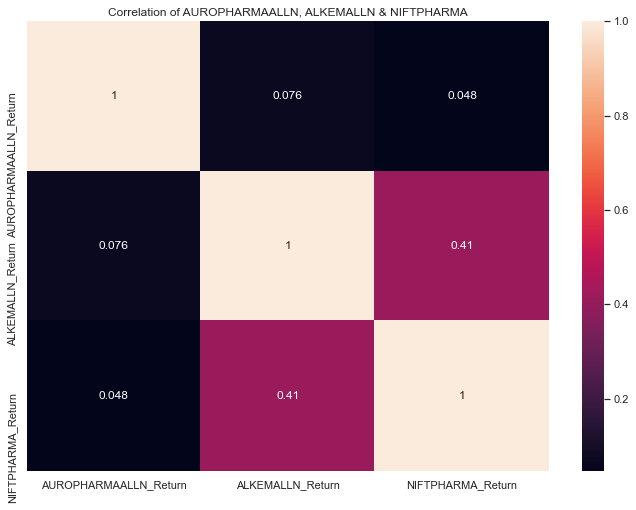

In [110]:
#Statitical visualization
sns.heatmap(df3.corr(), xticklabels = df3.columns, yticklabels = df3.columns, annot = True)
plt.title('Correlation of AUROPHARMAALLN, ALKEMALLN & NIFTPHARMA')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Correlation.jpeg")

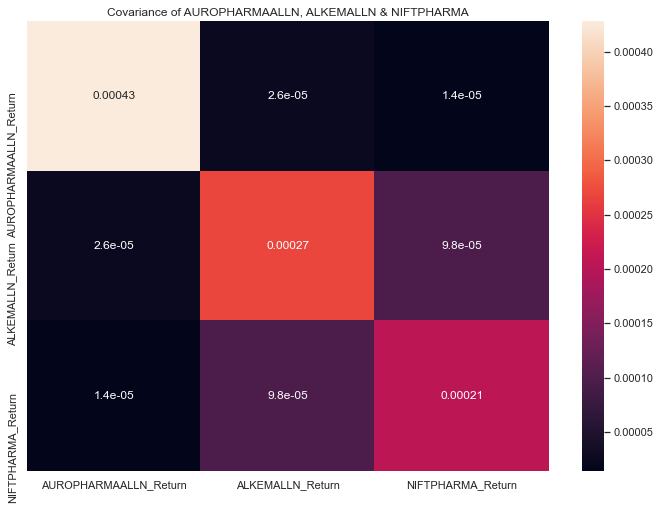

In [111]:
sns.heatmap(df3.cov(), xticklabels = df3.columns, yticklabels = df3.columns, annot = True)
plt.title('Covariance of AUROPHARMAALLN, ALKEMALLN & NIFTPHARMA')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Covariance.jpeg")

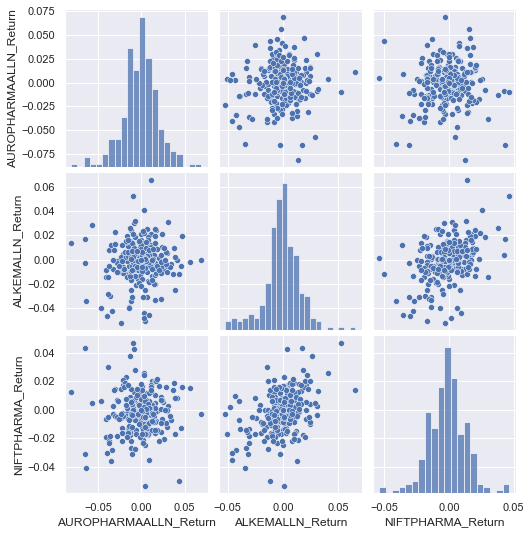

In [112]:
sns.pairplot(df3)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("pairplot.jpeg")

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


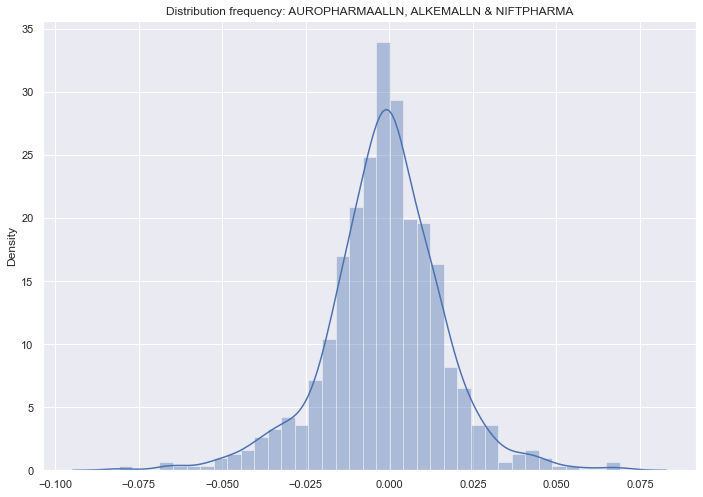

In [114]:
sns.distplot(df3)
plt.title('Distribution frequency: AUROPHARMAALLN, ALKEMALLN & NIFTPHARMA')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Distribution frequency1.jpeg")

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


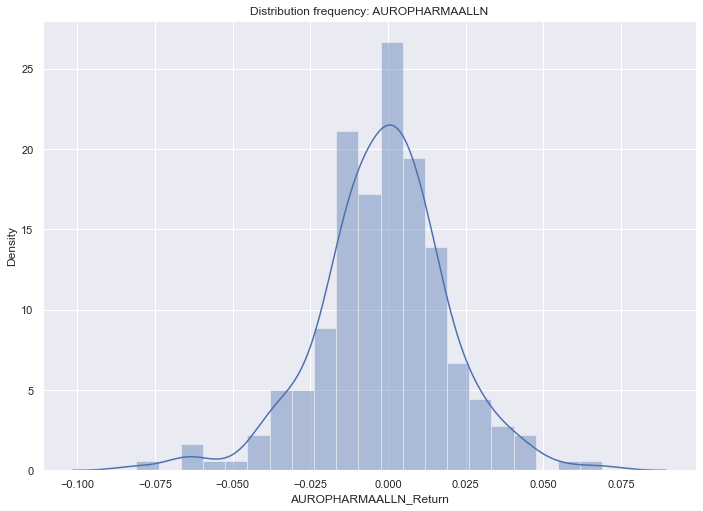

In [115]:
sns.distplot(df3['AUROPHARMAALLN_Return'])
plt.title('Distribution frequency: AUROPHARMAALLN')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Distribution frequency2.jpeg")

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


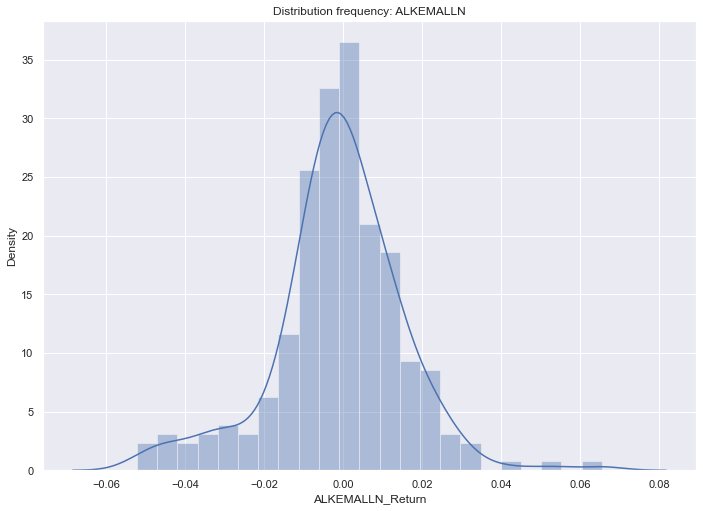

In [116]:
sns.distplot(df3['ALKEMALLN_Return'])
plt.title('Distribution frequency: ALKEMALLN')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Distribution frequency3.jpeg")

C:\Users\amanm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


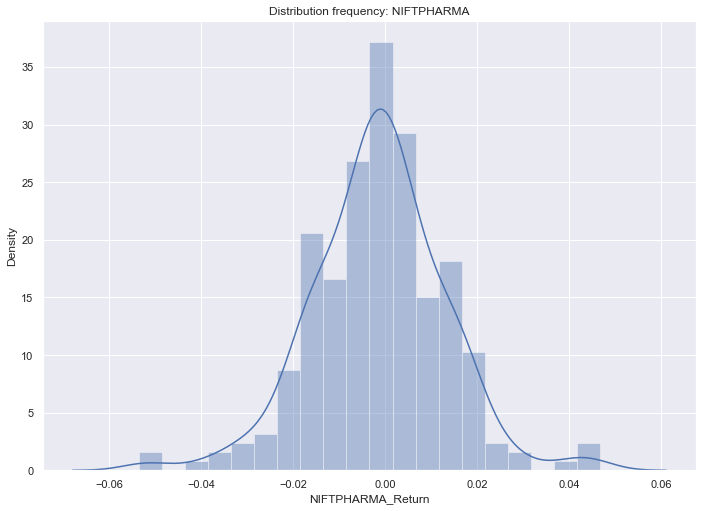

In [117]:
sns.distplot(df3['NIFTPHARMA_Return'])
plt.title('Distribution frequency: NIFTPHARMA')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Distribution frequency4.jpeg")

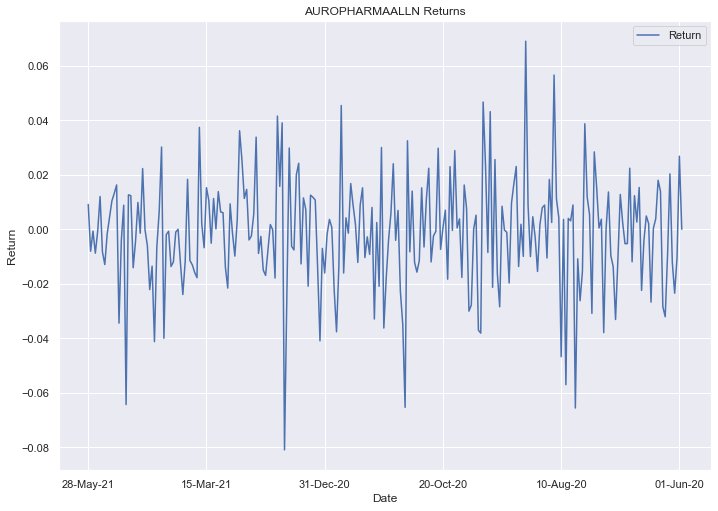

In [118]:
AUROPHARMAALLN.plot(x = "Date", y = "AUROPHARMAALLN_Return",label = "Return")
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('AUROPHARMAALLN Returns')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("AUROPHARMAALLN Returns.jpeg")

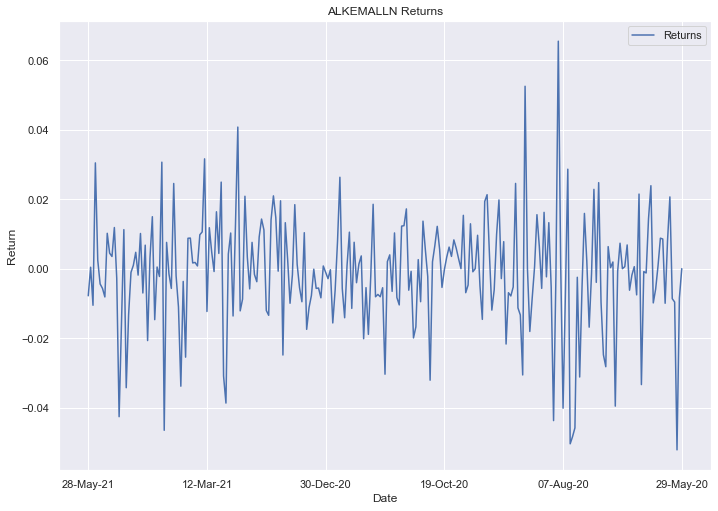

In [119]:
ALKEMALLN.plot(x = "Date", y = "ALKEMALLN_Return",label = "Returns")
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ALKEMALLN Returns')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("ALKEMALLN Returns.jpeg")

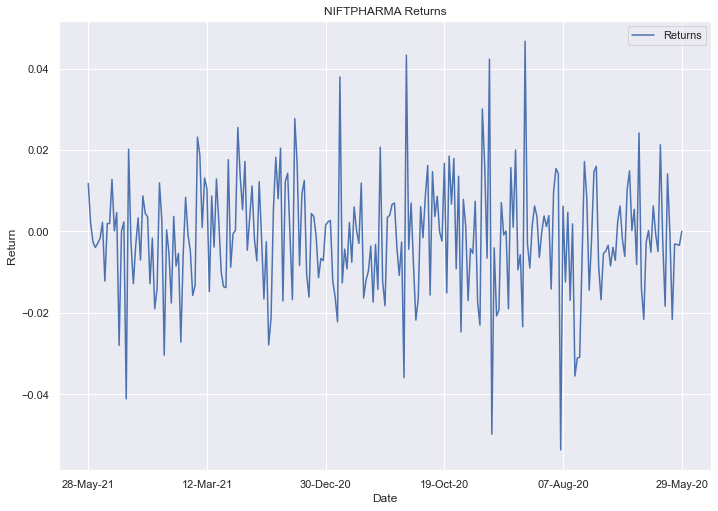

In [120]:
NIFTPHARMA.plot(x = "Date", y = "NIFTPHARMA_Return",label = "Returns")
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('NIFTPHARMA Returns')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("NIFTPHARMA_Return.jpeg")

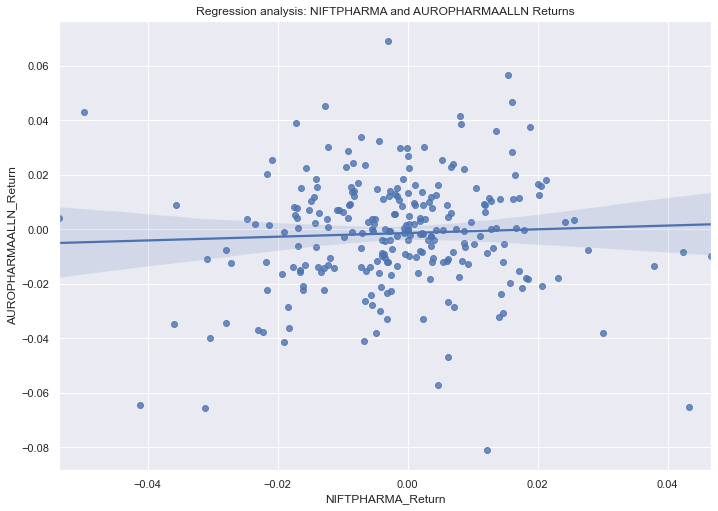

In [121]:
sns.regplot(x = df3['NIFTPHARMA_Return'], y = df3['AUROPHARMAALLN_Return'], data="a")
plt.title('Regression analysis: NIFTPHARMA and AUROPHARMAALLN Returns')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.savefig("Regression analysis1.jpeg")

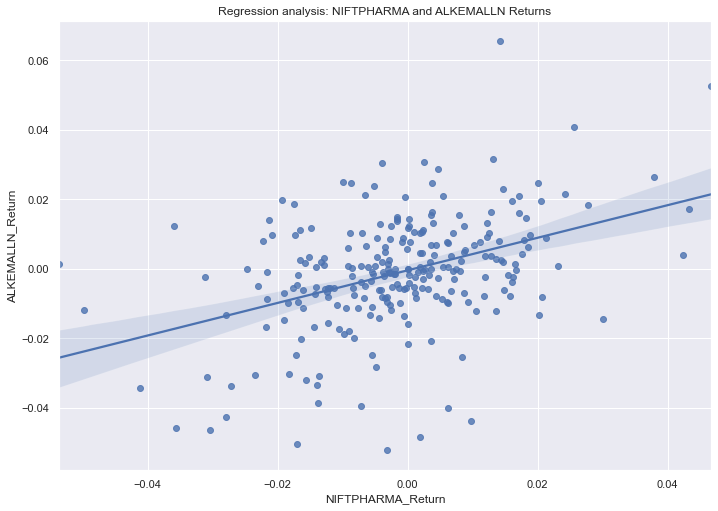

In [124]:
sns.regplot(x = df3['NIFTPHARMA_Return'], y = df3['ALKEMALLN_Return'], data="a")
plt.title('Regression analysis: NIFTPHARMA and ALKEMALLN Returns')
plt.savefig("Regression analysis2.jpeg")

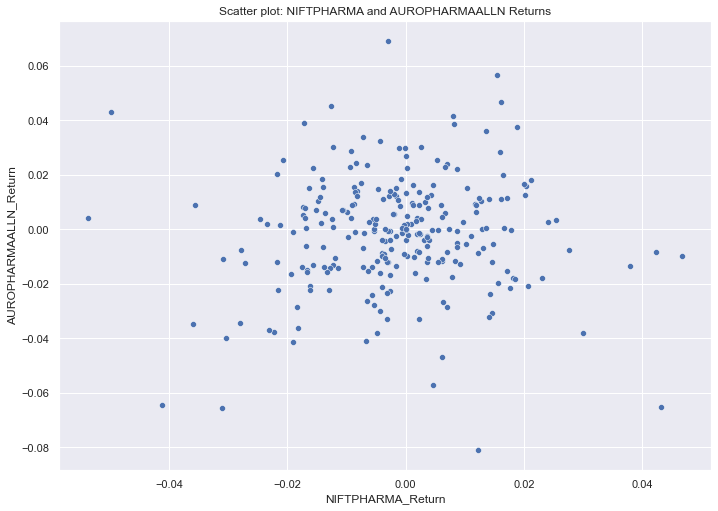

In [125]:
sns.scatterplot(x = df3['NIFTPHARMA_Return'], y = df3['AUROPHARMAALLN_Return'] )
plt.title('Scatter plot: NIFTPHARMA and AUROPHARMAALLN Returns')
plt.savefig("scatterplot1.jpeg")

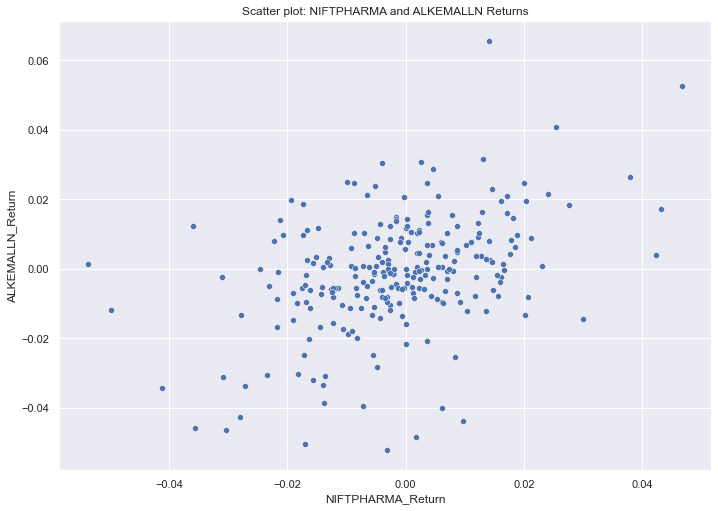

In [126]:
sns.scatterplot(x = df3['NIFTPHARMA_Return'], y = df3['ALKEMALLN_Return'], data="a")
plt.title('Scatter plot: NIFTPHARMA and ALKEMALLN Returns')
plt.savefig("scatterplot2.jpeg")

In [129]:
#Machine learning
df3.columns

Index(['AUROPHARMAALLN_Return', 'ALKEMALLN_Return', 'NIFTPHARMA_Return'], dtype='object')

In [141]:
X = df3.drop(columns=['AUROPHARMAALLN_Return', 'ALKEMALLN_Return'])

In [142]:
Y = df3['AUROPHARMAALLN_Return']

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [139]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [144]:
predt1 = model.predict(x_test1)
predt1

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
Score = accuracy_score(y_test1, predt1)